In [6]:
import pandas as pd
df = pd.read_csv (r'/home/jupyter/mammo_custom/mammo_custom.csv')
print('Data tatal:',len(df))

Data tatal: 210


In [7]:
Train = df[df['Split']!='test']
Test = df[df['Split']=='test']
print('Data train:',len(Train))
print('Data test:',len(Test))

Data train: 182
Data test: 28


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

In [10]:
options = ['mammo']
train = Train[Train['tagName'].isin(options)].sort_values('img_path')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# encode classname column since it has inly to classes
train['target'] = le.fit_transform(train.tagName)
print("Number of unique images in train set: ", train.img_path.nunique())

Number of unique images in train set:  182


In [11]:
bounding_box=[]
for i in range(len(train)):
    lst = []
    # extract coordinates of bounding box
    for box in train.iloc[i][["left",'top','width','height']]:
        lst.append(box)
    bounding_box.append(lst)  
    
#add new column with bounding boxes
train["bounding_box"] = bounding_box 

In [19]:
# get box(es) for each unique image
def get_boxes(filename):
    boxes = []
    # get bounding_box column for all rows where train["name"] == filename
    for box in train[train["img_path"] == filename]["bounding_box"]:
        boxes.append(box)
    return boxes

# draw an image with detected objects
def draw_facebox(image, boxes):
    # plot the image
    plt.imshow(image)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for box in boxes:
    # get coordinates
        x, y, width, height = box[0], box[1], box[2], box[3],
        # create the shape
        rect = plt.Rectangle((x, y), width, height, 
                             fill=False, color='b', linewidth=1)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

In [20]:
train_images = train.img_path.unique().tolist()
test_images = Test.img_path.unique().tolist()

[[56, 302, 42, 36]]
/home/jupyter/mammo_custom/train/Internal/mammo_27.jpg


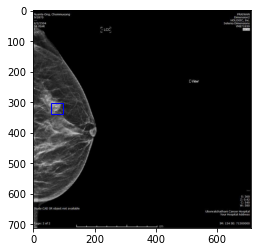

In [21]:
# pick a random index from train_images
i = np.random.choice(np.arange(1, len(train_images)))
# read image
image = plt.imread(os.path.join(train_images[i]))
# get boxes for image
boxes = get_boxes(train_images[i])
print(boxes)
print(train_images[i])
draw_facebox(image, boxes)

In [183]:
img_size=128
data=[]
for i in range(len(train)):
    x,y,width,height = train.iloc[i]['bounding_box']
    image = train.iloc[i]['img_path']
#     print(image)
    #Create an Image Object from an Image
    im = Image.open(os.path.join(image))
    # cropped = im.crop((x,height,width,y))
    cropped = im.crop((x,y,x+width,y+height))
    im = np.array(cropped)
    # print(30000+int(i))
    img = cv2.resize(im,(img_size,img_size))
    data.append([img,train.iloc[i]['target']])  

Shape of X: (182, 128, 128, 3)
Shape of Y: (182,)


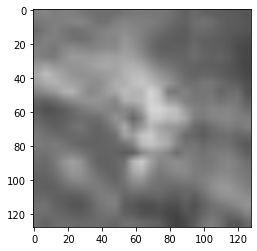

In [184]:
# Pick a random index from data
i = np.random.choice(range(len(data)))
plt.imshow(data[i][0]);

X=[]
Y=[]
for features, labels in data:
    X.append(features)
    Y.append(labels)
X = np.array(X)/255 
print('Shape of X:', X.shape)
Y = np.array(Y)
print('Shape of Y:', Y.shape)

# Training

In [185]:
from sklearn.model_selection import train_test_split
# split our data into train and validation sets
X_train,X_val,y_train,y_val = train_test_split(X, Y,train_size=0.8,random_state=0)

In [186]:
import os
from keras.models import save_model
from keras.initializers import RandomNormal
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, Adam
from keras.layers import Dense, Dropout
from keras.layers import LSTM
# from keras.utils.io_utils import HDF5Matrix
import h5py
# from models.my_callbacks import *
import time
# from keras.utils.io_utils import HDF5Matrix
from keras.layers import TimeDistributed,Activation, LSTM
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image 
import cv2
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [187]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5), padding='same', strides = 2))
model.add(Activation('relu'))
model.add(Conv2D(128, (5, 5), padding='same', strides = 2))
model.add(Activation('relu')) 
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', strides = 2))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', strides = 2))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', strides = 2))
model.add(Activation('relu'))  
model.add(Flatten())
# model.add(LSTM(512 , return_sequences=True))
# model.add(LSTM(512))
model.add(Dense(128))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       1

In [189]:
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
              loss='mean_squared_error', metrics=['accuracy']) 
# fit the model
history = model.fit(X_train,y_train,batch_size=32,
                 epochs=20,
                 validation_data=(X_val, y_val))

Epoch 1/20
5/5 [==============================] - 8s 2s/step - loss: 0.2372 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 1.0000
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 0.2294 - accuracy: 1.0000 - val_loss: 0.2237 - val_accuracy: 1.0000
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.2188 - accuracy: 1.0000 - val_loss: 0.2122 - val_accuracy: 1.0000
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.2061 - accuracy: 1.0000 - val_loss: 0.1984 - val_accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 0.1906 - accuracy: 1.0000 - val_loss: 0.1811 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 0.1708 - accuracy: 1.0000 - val_loss: 0.1584 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 8s 2s/step - loss: 0.1438 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 1.0000
Epoch 8/20
5/5 [=========================

Text(0.5, 0, 'Epoch')

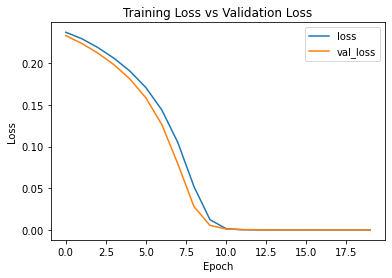

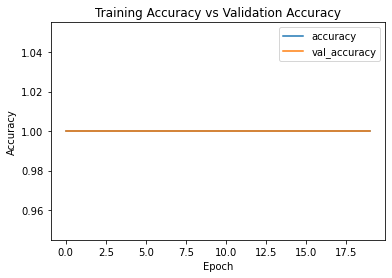

In [190]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Prediction

In [191]:
options = ['mammo']
Test = Test[Test['tagName'].isin(options)].sort_values('img_path')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# encode classname column since it has inly to classes
Test['target'] = le.fit_transform(Test.tagName)
print("Number of unique images in Test set: ", Test.img_path.nunique())

Number of unique images in Test set:  28


In [192]:
bounding_box=[]
for i in range(len(Test)):
    lst = []
    # extract coordinates of bounding box
    for box in Test.iloc[i][["left",'top','width','height']]:
        lst.append(box)
    bounding_box.append(lst)  
    
#add new column with bounding boxes
Test["bounding_box"] = bounding_box 

In [193]:
# get box(es) for each unique image
def get_boxes(filename):
    boxes = []
    # get bounding_box column for all rows where train["name"] == filename
    for box in Test[Test["img_path"] == filename]["bounding_box"]:
        boxes.append(box)
    return boxes

# draw an image with detected objects
def draw_facebox(image, boxes):
    # plot the image
    plt.imshow(image)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for box in boxes:
    # get coordinates
        x, y, width, height = box[0], box[1], box[2], box[3],
        # create the shape
        rect = plt.Rectangle((x, y), width, height, 
                             fill=False, color='b', linewidth=1)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

[[314, 421, 28, 20]]
/home/jupyter/mammo_custom/test/mammo_201.jpg


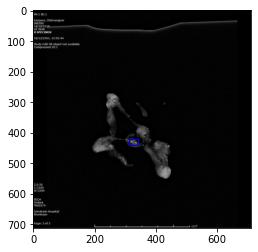

In [194]:
# pick a random index from train_images
i = np.random.choice(np.arange(1, len(test_images)))
# read image
image = plt.imread(os.path.join(test_images[i]))
# get boxes for image
boxes = get_boxes(test_images[i])
print(boxes)
print(test_images[i])
draw_facebox(image, boxes)

In [196]:
Testdf = Test[['img_path','target','bounding_box']]
Testdf.head()

,img_path,target,bounding_box
182,/home/jupyter/mammo_custom/test/mammo_182.jpg,0,"[599, 282, 50, 40]"
183,/home/jupyter/mammo_custom/test/mammo_183.jpg,0,"[599, 518, 37, 25]"
184,/home/jupyter/mammo_custom/test/mammo_184.jpg,0,"[70, 380, 50, 47]"
185,/home/jupyter/mammo_custom/test/mammo_185.jpg,0,"[102, 333, 42, 34]"
186,/home/jupyter/mammo_custom/test/mammo_186.jpg,0,"[39, 334, 52, 44]"


In [198]:
img_size=128
data1=[]
for i in range(len(Testdf)):
    x,y,width,height = Testdf.iloc[i]['bounding_box']
    image = Testdf.iloc[i]['img_path']
    #Create an Image Object from an Image
    im = Image.open(os.path.join(image))
    # cropped = im.crop((x,height,width,y))
    cropped = im.crop((x,y,x+width,y+height))
    im = np.asarray(cropped)
    img = cv2.resize(im,(img_size,img_size))
    data1.append(img) 

In [199]:
X = np.array(data1)/255
predict = model.predict(X)
Testdf['predict'] = [1 if i > 0.9 else 0 for i in predict]
Testdf

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,img_path,target,bounding_box,predict
182,/home/jupyter/mammo_custom/test/mammo_182.jpg,0,"[599, 282, 50, 40]",0
183,/home/jupyter/mammo_custom/test/mammo_183.jpg,0,"[599, 518, 37, 25]",0
184,/home/jupyter/mammo_custom/test/mammo_184.jpg,0,"[70, 380, 50, 47]",0
185,/home/jupyter/mammo_custom/test/mammo_185.jpg,0,"[102, 333, 42, 34]",0
186,/home/jupyter/mammo_custom/test/mammo_186.jpg,0,"[39, 334, 52, 44]",0
187,/home/jupyter/mammo_custom/test/mammo_187.jpg,0,"[363, 245, 60, 53]",0
188,/home/jupyter/mammo_custom/test/mammo_188.jpg,0,"[439, 561, 65, 47]",0
189,/home/jupyter/mammo_custom/test/mammo_189.jpg,0,"[286, 238, 36, 36]",0
190,/home/jupyter/mammo_custom/test/mammo_190.jpg,0,"[303, 456, 42, 31]",0
191,/home/jupyter/mammo_custom/test/mammo_191.jpg,0,"[392, 299, 93, 63]",0


In [200]:
act = Testdf['target'].tolist()
pred = Testdf['predict'].tolist()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
print(classification_report(act, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



Text(0.5, 12.5, 'Predicted label')

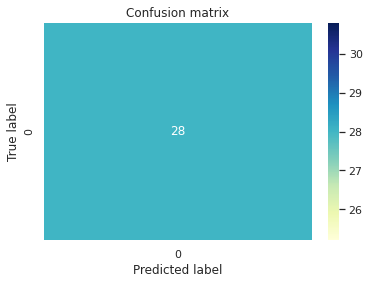

In [201]:
cm = confusion_matrix(act, pred)

sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

In [204]:
X = np.array(data1)/255
predict = model.predict(X)
Testdf['PredClass'] = ['No Mammo' if i > 0.9 else 'Mammo' for i in predict]
Testdf

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,img_path,target,bounding_box,predict,PredClass
182,/home/jupyter/mammo_custom/test/mammo_182.jpg,0,"[599, 282, 50, 40]",0,Mammo
183,/home/jupyter/mammo_custom/test/mammo_183.jpg,0,"[599, 518, 37, 25]",0,Mammo
184,/home/jupyter/mammo_custom/test/mammo_184.jpg,0,"[70, 380, 50, 47]",0,Mammo
185,/home/jupyter/mammo_custom/test/mammo_185.jpg,0,"[102, 333, 42, 34]",0,Mammo
186,/home/jupyter/mammo_custom/test/mammo_186.jpg,0,"[39, 334, 52, 44]",0,Mammo
187,/home/jupyter/mammo_custom/test/mammo_187.jpg,0,"[363, 245, 60, 53]",0,Mammo
188,/home/jupyter/mammo_custom/test/mammo_188.jpg,0,"[439, 561, 65, 47]",0,Mammo
189,/home/jupyter/mammo_custom/test/mammo_189.jpg,0,"[286, 238, 36, 36]",0,Mammo
190,/home/jupyter/mammo_custom/test/mammo_190.jpg,0,"[303, 456, 42, 31]",0,Mammo
191,/home/jupyter/mammo_custom/test/mammo_191.jpg,0,"[392, 299, 93, 63]",0,Mammo


Text(0.5, 1.0, 'Test')

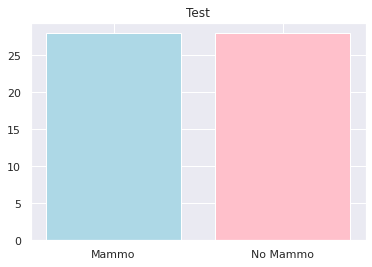

In [205]:
plt.bar(['Mammo','No Mammo'], Testdf.PredClass.value_counts(), color = ['lightblue','pink']);
plt.title('Test')